Construction of a simple ANN

In [ ]:
#Independent variables
input_set = np.array([[0,0],
                      [0,1],
                      [1,0],
                      [1,1],
                      ])#Dependent variable
labels = np.array([[0,
                    0,
                    0,
                    1
                    ]])

labels = labels.reshape(4,1) #to convert labels to vector

labels

array([[0],
       [0],
       [0],
       [1]])

In [ ]:
# define hyperparameters
np.random.seed(42)
weights = np.random.rand(2,1)
bias = np.random.rand(1)
lr = 0.05 #learning rate

In [ ]:
# define activation function and derivative
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))

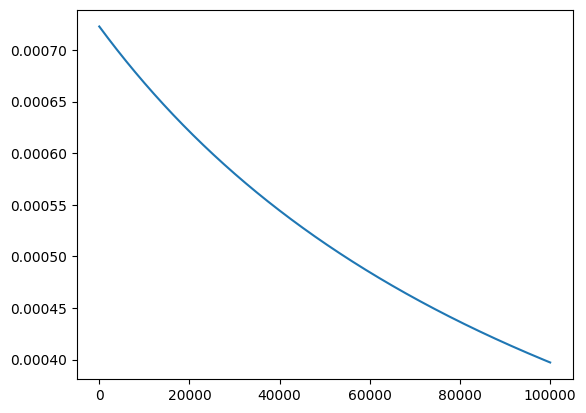

In [ ]:
n_epoch = 100000
errs = np.empty(n_epoch)
for epoch in range(n_epoch):
    inputs = input_set

    # forward propagation
    XW = np.dot(inputs, weights)+ bias
    z = sigmoid(XW)

    # backpropagation
    error = z - labels
    #print(error.sum())
    errs[epoch] = error.sum()
    dcost = error
    dpred = sigmoid_derivative(z)
    z_del = dcost * dpred
    inputs = input_set.T

    # update the weights
    weights = weights - lr*np.dot(inputs, z_del)

    # update the bias term
    for num in z_del:
        bias = bias - lr*num

import matplotlib.pyplot as plt
plt.plot(errs)

In [ ]:
single_pt = np.array([1,1])
result = sigmoid(np.dot(single_pt, weights) + bias)
print(result)

[0.99682635]


# Another example for regression

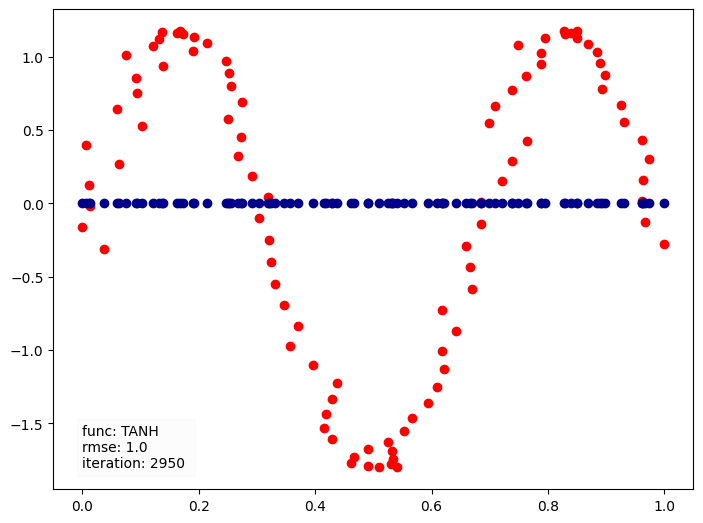

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from IPython.display import clear_output
import math

# -- Transition functions
def relu(x):
    return (x > 0) * x


def relu_derivative(output):
    return output > 0


def tanh(x):
    return (np.e ** (x) - np.e ** (-x)) / (np.e ** (x) + np.e ** (-x))


def tanh_derivative(x):
    return 1 - tanh(x)

def lrelu(x):
    x = np.where(x > 0, x, x * 0.001)
    return x

def lrelu_derivative(x):
    dx = np.ones_like(x)
    dx[x < 0] = 0.001
    return dx

# choose Transition function
transition_func = tanh
transition_func_derivative =tanh_derivative


# -- Data

# coos (1) or (2) or generate yor own data
np.random.seed(seed=1)

# (1)
# n = 200
# x = np.array(np.array([(1, i + np.random.normal(loc=4, scale=6)) for i in range(0, n)]))
# y = np.array([np.array([i + np.random.normal(loc=0, scale=2, )]) for i in range(0, n)])
# y = (y - y.mean()) ** 2

# (2)
x = np.arange(0,3*np.pi,0.1)   # start,stop,step
y = np.sin(x).reshape(len(x),1)
x = np.array(np.array([(1, i + np.random.normal(loc=0, scale=0.2))for i in x]))

# -- Normalization
x[:, 1] = (x[:, 1] - x[:, 1].mean()) / x[:, 1].std()
y = (y - y.mean()) / y.std()

# -- Scaling
x[:, 1] = (x[:, 1] + abs(x[:, 1].min()))
x[:, 1] = x[:, 1] / x[:, 1].max()

# -- Params
# Step size
alpha = 0.01

# Number of iterations
iters = 100000

# Number of nuerons
hidden_size = 20

# -- Weights initiation
# Final_Weights
mu = y.mean()

w2 = np.array([np.random.normal(loc=mu, scale=0.5) for i in range(0, hidden_size)]).reshape(hidden_size, 1)

# First_hidden_weigts
w1 = np.array(np.array([[np.random.normal(loc=mu, scale=0.5)] * hidden_size for i in range(0, x.shape[1])]))

# -- iterate and plot predicted vs actual each 300 iterations
for iteration in range(3000):
    for i in range(len(x)):
        # batch
        layer_0 = x[i:i + 1]

        # - Forward -
        y_hat = transition_func(layer_0 @ w1) @ w2

        # - Backward -
        # Predicted vs actual
        diff = y_hat - y[i:i + 1]

        # w2 gradient
        w2_grad = diff @ transition_func(layer_0 @ w1)

        # w1 gradient
        w1_grad = (diff @ w2.T * transition_func_derivative(layer_0 @ w1)).T @ layer_0

        # update weights
        w2 -= alpha * w2_grad.T
        w1 -= alpha * w1_grad.T

    if iteration % 50 == 0:
        y_pred = transition_func(x @ w1) @ w2
        n = len(x)
        e = sum((y_pred - y) ** 2 / n)[0]

        clear_output(wait=True)
        fig = plt.figure()
        ax = fig.add_axes([0, 0, 1, 1])
        ax.scatter(x=x[:, 1], y=y, color='r')
        ax.scatter(x[:, 1], y_pred, color='darkblue')
        ax.text(x.min(),y.min(), f'func: TANH\nrmse: {e:.3}\niteration: {iteration} ',bbox=dict(facecolor='darkblue', alpha=0.01))

        plt.show()


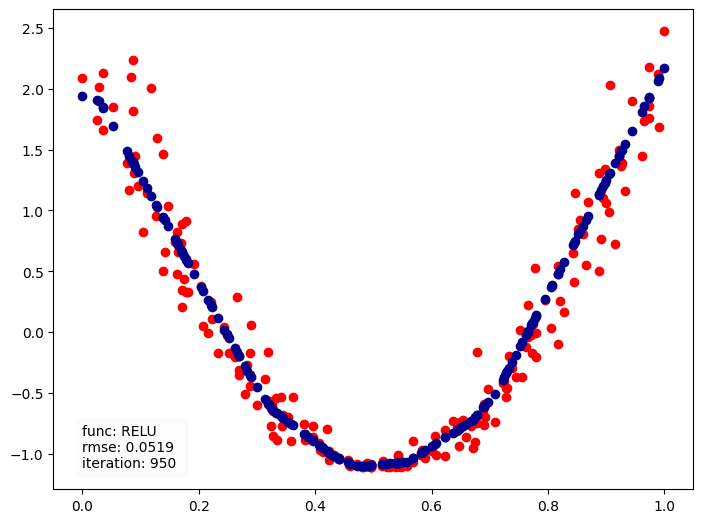

In [ ]:
# Lets try it with RELU
transition_func = relu
transition_func_derivative =relu_derivative

# -- Data

# coos (1) or (2) or generate yor own data
np.random.seed(seed=1)

# (1)
n = 200
x = np.array(np.array([(1, i + np.random.normal(loc=4, scale=6)) for i in range(0, n)]))
y = np.array([np.array([i + np.random.normal(loc=0, scale=2, )]) for i in range(0, n)])
y = (y - y.mean()) ** 2

# (2)
# x = np.arange(0,3*np.pi,0.1)   # start,stop,step
# y = np.sin(x).reshape(len(x),1)
# x = np.array(np.array([(1, i + np.random.normal(loc=0, scale=0.2))for i in x]))

# -- Normalization
x[:, 1] = (x[:, 1] - x[:, 1].mean()) / x[:, 1].std()
y = (y - y.mean()) / y.std()

# -- Scaling
x[:, 1] = (x[:, 1] + abs(x[:, 1].min()))
x[:, 1] = x[:, 1] / x[:, 1].max()

# -- Params
# Step size
alpha = 0.001

# Number of iterations
iters = 1000

# Number of nuerons
hidden_size = 20


# -- Weights initiation
# Final_Weights
mu = y.mean()

w2 = np.array([np.random.normal(loc=mu, scale=0.5) for i in range(0, hidden_size)]).reshape(hidden_size, 1)

# First_hidden_weigts
w1 = np.array(np.array([[np.random.normal(loc=mu, scale=0.5)] * hidden_size for i in range(0, x.shape[1])]))


# -- iterate and plot predicted vs actual each 300 iterations
for iteration in range(iters):
    for i in range(len(x)):
        # batch
        layer_0 = x[i:i + 1]

        # - Forward -
        y_hat = transition_func(layer_0 @ w1) @ w2

        # - Backward -
        # Predicted vs actual
        diff = y_hat - y[i:i + 1]

        # w2 gradient
        w2_grad = diff @ transition_func(layer_0 @ w1)

        # w1 gradient
        w1_grad = (diff @ w2.T * transition_func_derivative(layer_0 @ w1)).T @ layer_0

        # update weights
        w2 -= alpha * w2_grad.T
        w1 -= alpha * w1_grad.T

    if iteration % 50 == 0:
        y_pred = transition_func(x @ w1) @ w2
        n = len(x)
        e = sum((y_pred - y) ** 2 / n)[0]

        clear_output(wait=True)
        fig = plt.figure()
        ax = fig.add_axes([0, 0, 1, 1])
        ax.scatter(x=x[:, 1], y=y, color='r')
        ax.scatter(x[:, 1], y_pred, color='darkblue')
        ax.text(x.min(),y.min(), f'func: RELU\nrmse: {e:.3}\niteration: {iteration} ',bbox=dict(facecolor='darkblue', alpha=0.01))

        plt.show()


In [ ]:
# load data
from google.colab import drive
drive.mount('/content/drive')

filedir = '/content/drive/MyDrive/Teaching/FWE458_Spring2024/Lec20/'
fname = filedir + "SW_with_AOD.csv"

import pandas as pd
BSRN = pd.read_csv(fname)
BSRN

Mounted at /content/drive


,SZA,AOD,COD,CLD_FRAC,UW,TO3,Pressure,BSA,WSA,SW_direct,SW_diffuse
0,24.936783,1.172892,2.440000,0.286546,2.021502,311.419861,959.085083,0.162,0.193,467.191650,300.820007
1,34.865055,1.626954,4.630000,0.468832,4.859887,308.713379,968.427551,0.155,0.169,264.900024,385.293335
2,27.330978,1.095007,2.030000,0.301414,5.278558,293.322052,988.040588,0.136,0.149,313.553314,321.538361
3,20.361732,1.126541,5.500000,0.377019,4.856422,321.498199,977.610229,0.156,0.179,143.902298,501.073639
4,13.433228,0.725452,0.736076,0.075378,0.644262,295.448975,882.321411,0.188,0.212,957.331665,79.003334
...,...,...,...,...,...,...,...,...,...,...,...
35219,37.315063,0.181112,2.360000,0.071185,2.312875,268.948242,970.049805,0.146,0.171,474.672302,207.633331
35220,64.573303,0.258045,0.392416,0.060352,0.893602,328.640442,988.746948,0.135,0.132,382.056671,74.483337
35221,61.829556,0.138252,0.233040,0.033619,2.335012,259.676788,970.049805,0.146,0.171,115.962257,281.266663
35222,67.391891,0.698632,1.368286,0.218022,0.462143,265.180176,811.828369,0.192,0.183,385.561645,50.876663


In [ ]:
X = BSRN[["SZA", "AOD", "COD", "CLD_FRAC", "UW", "TO3", "Pressure", "BSA", "WSA"]]
y = BSRN.SW_direct + BSRN.SW_diffuse

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

mlp = MLPRegressor(hidden_layer_sizes=(10,10), activation='relu', max_iter=1000)
mlp.fit(Xtrain, ytrain)

ypred_train = mlp.predict(Xtrain)
ypred_test = mlp.predict(Xtest)

221.68692868624717


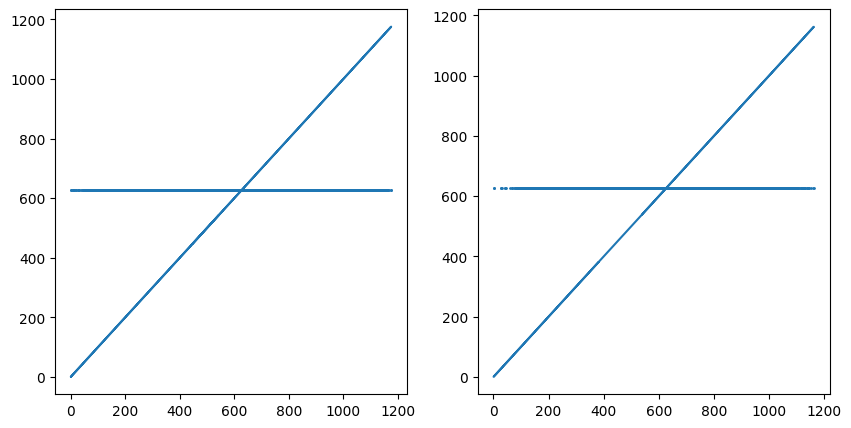

In [ ]:
fig,ax = plt.subplots(1,2, figsize=[10,5])

ax[0].scatter(ytrain, ypred_train, s=1)
ax[0].plot(ytrain, ytrain, linestyle='solid')


# Calculate the point density
ax[1].scatter(ytest,ypred_test, s=1)
ax[1].plot(ytest, ytest, linestyle='solid')

rmse = np.sqrt(np.mean((ytest-ypred_test)**2))
print(rmse)